In [2]:
import hdf5storage as h5
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
files_mat = [f for f in os.listdir('.') if f.endswith('.mat')]
files_mat.sort()

0 0 A_ID0038C02_dataset.mat
0 1 A_ID0047C01_dataset.mat
0 2 A_ID0047C2_dataset.mat
0 3 A_ID0050C02_dataset.mat
0 4 A_ID0065C01_dataset.mat
1 0 B_ID0067C01_dataset.mat
1 1 B_ID0070_dataset.mat
1 2 B_ID0072C02_dataset.mat
1 3 B_ID0075C05_dataset.mat
1 4 B_ID0084C02_dataset.mat


/home/domenico/miniconda3/envs/ViT/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/domenico/miniconda3/envs/ViT/lib/python3.11/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/domenico/miniconda3/envs/ViT/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/domenico/miniconda3/envs/ViT/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/domenico/miniconda3/envs/ViT/lib/python3.11/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


<Figure size 1500x1000 with 0 Axes>

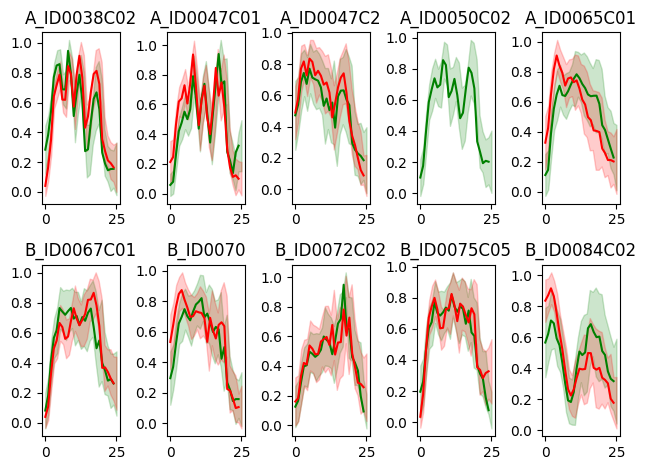

In [4]:
plt.figure(figsize=(15, 10))
fig, axs = plt.subplots(2, 5)
x = np.linspace(0, 25, 25)

for i, name in enumerate(files_mat):
    file = h5.loadmat(name)
    data = file.get('data')
    labels = file.get('label')

    #normalizzazione firme spettrali
    data_normalized = np.zeros(data.shape)
    for j in range(data.shape[0]):
        massimo = np.max(data[j,:])
        minimo = np.min(data[j,:])
        data_normalized[j,:] = (data[j,:] - minimo) / (massimo - minimo)

    indices_norm = np.where(labels == 101)
    indices_tumor = np.where((labels == 200) | (labels == 221))
    indices_blood = np.where((labels == 301) | (labels == 302))
    indices_dura = np.where(labels == 320)

    pixels_norm = data_normalized[indices_norm[0],:]
    pixels_tumor = data_normalized[indices_tumor[0],:]
    pixels_blood = data_normalized[indices_blood[0],:]
    pixels_dura = data_normalized[indices_dura[0],:]

    mean_norm = np.mean(pixels_norm, axis=0)
    std_norm = np.std(pixels_norm, axis=0)
    #print("Norm std.dev: ", std_norm)

    mean_tumor = np.mean(pixels_tumor, axis=0)
    std_tumor = np.std(pixels_tumor, axis=0)
    #print("Tumor std.dev: ", std_tumor)

    mean_blood = np.mean(pixels_blood, axis=0)
    std_blood = np.std(pixels_blood, axis=0)
    #print("Blood std.dev: ", std_blood)

    mean_dura = np.mean(pixels_dura, axis=0)
    std_dura = np.std(pixels_dura, axis=0)
    #print("Dura std.dev: ", std_dura)

    axs[i//5, i%5].plot(mean_norm, label='norm', color='green')
    axs[i//5, i%5].plot(mean_tumor, label='tumor', color='red')

    axs[i//5, i%5].fill_between(x, mean_norm - std_norm, mean_norm + std_norm, color='green', alpha=0.2)
    axs[i//5, i%5].fill_between(x, mean_tumor - std_tumor, mean_tumor + std_tumor, color='red', alpha=0.2)

    axs[i//5, i%5].set_title(name[:name.rfind('_', 0)])

    print(i//5,i%5,name)

plt.tight_layout()
plt.show()

0 0 A_ID0038C02_dataset.mat
0 1 A_ID0047C01_dataset.mat
0 2 A_ID0047C2_dataset.mat
0 3 A_ID0050C02_dataset.mat
0 4 A_ID0065C01_dataset.mat
1 0 B_ID0067C01_dataset.mat
1 1 B_ID0070_dataset.mat
1 2 B_ID0072C02_dataset.mat
1 3 B_ID0075C05_dataset.mat
1 4 B_ID0084C02_dataset.mat


<Figure size 1500x1000 with 0 Axes>

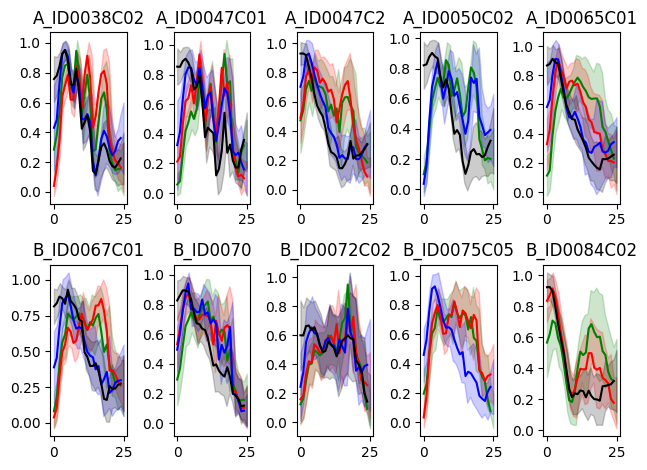

In [5]:
plt.figure(figsize=(15, 10))
fig, axs = plt.subplots(2, 5)
x = np.linspace(0, 25, 25)

for i, name in enumerate(files_mat):
    file = h5.loadmat(name)
    data = file.get('data')
    labels = file.get('label')

    #normalizzazione firme spettrali
    data_normalized = np.zeros(data.shape)
    for j in range(data.shape[0]):
        massimo = np.max(data[j,:])
        minimo = np.min(data[j,:])
        data_normalized[j,:] = (data[j,:] - minimo) / (massimo - minimo)

    indices_norm = np.where(labels == 101)
    indices_tumor = np.where((labels == 200) | (labels == 221))
    indices_blood = np.where((labels == 301) | (labels == 302))
    indices_dura = np.where(labels == 320)

    pixels_norm = data_normalized[indices_norm[0],:]
    pixels_tumor = data_normalized[indices_tumor[0],:]
    pixels_blood = data_normalized[indices_blood[0],:]
    pixels_dura = data_normalized[indices_dura[0],:]

    mean_norm = np.mean(pixels_norm, axis=0)
    std_norm = np.std(pixels_norm, axis=0)
    #print("Norm std.dev: ", std_norm)

    mean_tumor = np.mean(pixels_tumor, axis=0)
    std_tumor = np.std(pixels_tumor, axis=0)
    #print("Tumor std.dev: ", std_tumor)

    mean_blood = np.mean(pixels_blood, axis=0)
    std_blood = np.std(pixels_blood, axis=0)
    #print("Blood std.dev: ", std_blood)

    mean_dura = np.mean(pixels_dura, axis=0)
    std_dura = np.std(pixels_dura, axis=0)
    #print("Dura std.dev: ", std_dura)

    axs[i//5, i%5].plot(mean_norm, label='norm', color='green')
    axs[i//5, i%5].plot(mean_tumor, label='tumor', color='red')
    axs[i//5, i%5].plot(mean_blood, label='blood', color='blue')
    axs[i//5, i%5].plot(mean_dura, label='dura', color='black')

    axs[i//5, i%5].fill_between(x, mean_norm - std_norm, mean_norm + std_norm, color='green', alpha=0.2)
    axs[i//5, i%5].fill_between(x, mean_tumor - std_tumor, mean_tumor + std_tumor, color='red', alpha=0.2)
    axs[i//5, i%5].fill_between(x, mean_blood - std_blood, mean_blood + std_blood, color='blue', alpha=0.2)
    axs[i//5, i%5].fill_between(x, mean_dura - std_dura, mean_dura + std_dura, color='black', alpha=0.2)
    
    axs[i//5, i%5].set_title(name[:name.rfind('_', 0)])

    print(i//5,i%5,name)

plt.tight_layout()
plt.show()